# Pentathlon 2: Testing for the best frequency

In [1]:
# loading required python packages
# you can add more packages as needed but *only* use packages 
# that are already part of the docker computing environment
import numpy as np
import pandas as pd
import seaborn as sns

### Question 1: Calculate the CLV over 8 weeks for each email frequency (8 points)

In [32]:
# load data from the excel file here
# each freq1-freq5 variable should be a pandas DataFrame with shape (8, 3)
# set the colum names to "attr" for subcriber attrition, "rev_sub" for average revenue
# from a subscribed customer, and "rev_unsub" for average revenue
# from an unsubscribed customer
data = pd.read_excel("data/pentathlon-2.xls", header=None)

freq1 = data.iloc[1:4, 1:].T.rename(columns ={1:"attr", 2:"rev_sub", 3:"rev_unsub"}).reset_index(drop = True)
freq2 = data.iloc[6:9, 1:].T.rename(columns ={6:"attr", 7:"rev_sub", 8:"rev_unsub"}).reset_index(drop = True)
freq3 = data.iloc[11:14, 1:].T.rename(columns ={11:"attr", 12:"rev_sub", 13:"rev_unsub"}).reset_index(drop = True)
freq4 = data.iloc[16:19, 1:].T.rename(columns ={16:"attr", 17:"rev_sub", 18:"rev_unsub"}).reset_index(drop = True)
freq5 = data.iloc[21:24, 1:].T.rename(columns ={21:"attr", 22:"rev_sub", 23:"rev_unsub"}).reset_index(drop = True)

freq1["attr"][1:8] = freq1["attr"][0:7]
freq1.iloc[0,0] = 0

freq2["attr"][1:8] = freq2["attr"][0:7]
freq2.iloc[0,0] = 0

freq3["attr"][1:8] = freq3["attr"][0:7]
freq3.iloc[0,0] = 0

freq4["attr"][1:8] = freq4["attr"][0:7]
freq4.iloc[0,0] = 0

freq5["attr"][1:8] = freq5["attr"][0:7]
freq5.iloc[0,0] = 0

In [33]:
freq4

,attr,rev_sub,rev_unsub
0,0,0.36,0
1,0.0385,0.34,0.19
2,0.0525,0.3,0.16
3,0.058,0.38,0.18
4,0.0413,0.39,0.17
5,0.0398,0.34,0.12
6,0.031,0.36,0.12
7,0.031,0.37,0.12


# Assumptions
1. The cost of goods sold was 60%.
2. Pentathlon used an annual discount rate of 10%.
3. All unsubscribe requests would be processed at the end of each week, which means customers who unsubscribed, for example, on Wednesday, **will still be considered as subscribed customer until the beginning of the next week.**

In [34]:
# list your assumptions here
weeks = np.arange(1, 9)
cogs = 0.6 # cost of goods sold
annual_discount_rate = 0.1
weekly_discount_rate = pow(1 + annual_discount_rate, (1 / 52)) - 1

In [35]:
# calculate CLV for e-mail frequency 4 (i.e., freq4)
# this will require calculating each of the following variables
# each calculated object should be of shape (8,)

In [37]:
profit_subcribed = (1 - cogs) * freq4["rev_sub"]
profit_unsubscribed = (1 - cogs) * freq4["rev_unsub"]
probability_subscribed = (1 - freq4["attr"]).cumprod()
probability_unsubscribed = 1 - probability_subscribed
expected_profit = profit_subcribed * probability_subscribed + profit_unsubscribed * probability_unsubscribed
pv_expected_profit = expected_profit / np.power(1 + weekly_discount_rate, weeks)
clv = np.cumsum(pv_expected_profit)


0         0
1    0.0385
2    0.0525
3     0.058
4    0.0413
5    0.0398
6     0.031
7     0.031
Name: attr, dtype: object

In [43]:
# take your code above and use it as the base to define a function to calculate clv 
# this will avoid repetitive code
# note that the function "clv_calc" should be sufficiently general to work with the data
# for each of the 5 e-mail frequencies 
# note that the function must be defined in a cell above the code that calls the function

In [22]:
def clv_calc(df, weeks, cogs, wd):
    """
    Calculate the cumulative present value of profits
    and CLV for a pandas data frame using the results from 
    the email frequency experiment
    
    Parameters
    ----------
    df : Pandas DataFrame (8, 3)
        A DataFrame with revenue and attrition information
    weeks : Numpy array 
        Array of shape (8,) with values 1 through 8
    cogs : float
        Cost of Goods Sold
    wd: float
        Weekly discount rate
        
    Returns
    -------
    Pandas series of shape (8,)
        CLV values calculate for week 1 through week 8

    """
    profit_subcribed = (1 - cogs) * df["rev_sub"]
    profit_unsubscribed = (1 - cogs) * df["rev_unsub"]
    probability_subscribed = (1 - df["attr"]).cumprod()
    probability_unsubscribed = 1 - probability_subscribed
    expected_profit = profit_subcribed * probability_subscribed + profit_unsubscribed * probability_unsubscribed
    pv_expected_profit = expected_profit / np.power(1 + wd, weeks)
    clv = np.cumsum(pv_expected_profit)
    return clv.astype(np.float64)

In [24]:
# call the 'clv_calc` function to create a pandas dataframe `CLV8` 
# with shape (8, 6). One of the columns should be called 'weeks'
# and the others 'freq1', 'freq2', etc.
clv_calc(freq3, weeks, cogs, weekly_discount_rate)
CLV8 = pd.DataFrame({"weeks": weeks, 
                    "freq1":clv_calc(freq1, weeks, cogs, weekly_discount_rate),
                    "freq2":clv_calc(freq2, weeks, cogs, weekly_discount_rate), 
                    "freq3":clv_calc(freq3, weeks, cogs, weekly_discount_rate), 
                    "freq4":clv_calc(freq4, weeks, cogs, weekly_discount_rate),
                    "freq5":clv_calc(freq5, weeks, cogs, weekly_discount_rate)
                    })

CLV8

,weeks,freq1,freq2,freq3,freq4,freq5
0,1,0.115788,0.139744,0.147729,0.143736,0.143736
1,2,0.239116,0.259042,0.269880,0.276937,0.271861
2,3,0.357969,0.397294,0.409082,0.391324,0.384678
3,4,0.484080,0.550043,0.558557,0.530951,0.522180
4,5,0.597913,0.670942,0.681991,0.670071,0.649644
5,6,0.699639,0.798453,0.809560,0.786305,0.773973
6,7,0.804652,0.932948,0.943915,0.906245,0.888073
7,8,0.913132,1.062909,1.071311,1.026644,0.994697


### Question 2: Create a line graph of the CLV values for each plan change over the 8 week period. Your code should create a single plot with 5 lines (2 points)

Text(0, 0.5, 'CLV')

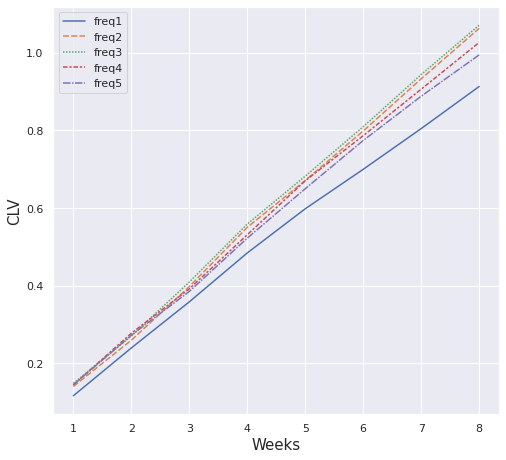

In [46]:
# use seaborn to create a line chart that shows CLV over the 8 week period
# for each of the 5 email frequencies (i.e., 1 plot with 5 lines)
CLV8 = CLV8.set_index('weeks')
sns.set(rc = {'figure.figsize':(8,7.5)})
fig = sns.lineplot(data = CLV8)
fig.set_xlabel("Weeks", fontsize = 15)
fig.set_ylabel("CLV", fontsize = 15)

### Question 3: What e-mail frequency should Pentathlon adopt based on the available data? (6 points)

Based on available data, Pentathlon should adopt freq3, which lead to maximum CLV based on my model.

### Question 4: What e-mail frequency would you recommend if you considered a longer time horizon?

I recommend send 2 promotional emails to customers per week. Although it shows that 3 emails can maximize CLV, most customers dislike too many promotional emails and will probably unsubscribe in the long run.

### Question 5: CLV over 104 weeks (4 points)

Calculate the CLV for each of the 5 plans after 104 weeks using the average churn and revenue numbers from `pentathlon-2-avg.csv` in the git repo.

In [52]:
# load input data for simulation here
sim_clv = pd.read_csv("data/pentathlon-2-avg.csv")
freq1 = sim_clv.iloc[0,:]
freq2 = sim_clv.iloc[1,:]
freq3 = sim_clv.iloc[2,:]
freq4 = sim_clv.iloc[3,:]
freq5 = sim_clv.iloc[4,:]
sim_clv

,email_freq,schurn,rev_sub,rev_unsub
0,freq1,0.004051,0.290003,0.123387
1,freq2,0.006266,0.340007,0.126506
2,freq3,0.023799,0.356240,0.144505
3,freq4,0.036650,0.355157,0.138084
4,freq5,0.055843,0.358784,0.131037


In [39]:
# list your assumptions here
weeks104 = np.arange(1, 104 + 1)
cogs = 0.6
annual_discount_rate = 0.1
weekly_discount_rate = pow(1 + annual_discount_rate, (1 / 52)) - 1

In [40]:
# calculate CLV for e-mail frequency 4 (i.e., freq4)
# this will require calculating each of the following variables
# each calculated object below should be either a float or of shape (104,)

In [45]:
profit_subcribed104 = (1 - cogs) * freq4["rev_sub"].repeat(104)
profit_unsubscribed104 = (1 - cogs) * freq4["rev_unsub"].repeat(104)
probability_subscribed104 = (1 - freq4["schurn"]).repeat(103).cumprod()
probability_subscribed104 = np.insert(probability_subscribed104, 0, 1)
probability_unsubscribed104 = 1 - probability_subscribed104
expected_profit104 = profit_subcribed104 * probability_subscribed104 + profit_unsubscribed104 * probability_unsubscribed104
pv_expected_profit104 = expected_profit104 / np.power(1 + weekly_discount_rate, weeks104)
clv104 = np.cumsum(pv_expected_profit104)


In [46]:
# calculate CLV for each of the 5 e-mail frequencies and combine the result in a dataframe
# define a function "sim_csv_calc" to avoid repetitive code
# note that the function must be defined in a cell above the code that calls the function

In [50]:
def sim_clv_calc(df, weeks, cogs, wd):
    """
    Calculate the cumulative present value of profits
    and CLV for a pandas data frame with simulated 
    subscriber churn over a 104 week period
    
    Parameters
    ----------
    df : Pandas DataFrame (1, 4)
        A DataFrame with revenue and attrition information
    weeks : Numpy array 
        Array of shape (n,) with values 1 through n
    cogs : float
        Cost of Goods Sold
    wd: float
        Weekly discount rate
        
    Returns
    -------
    Pandas series of shape (n,)
        CLV values calculate for week 1 through week n

    """

    profit_subcribed104 = (1 - cogs) * df["rev_sub"].repeat(104)
    profit_unsubscribed104 = (1 - cogs) * df["rev_unsub"].repeat(104)
    probability_subscribed104 = (1 - df["schurn"]).repeat(103).cumprod()
    probability_subscribed104 = np.insert(probability_subscribed104, 0, 1)
    probability_unsubscribed104 = 1 - probability_subscribed104
    expected_profit104 = profit_subcribed104 * probability_subscribed104 + profit_unsubscribed104 * probability_unsubscribed104
    pv_expected_profit104 = expected_profit104 / np.power(1 + wd, weeks104)
    clv104 = np.cumsum(pv_expected_profit104)
    
    return clv104.astype(np.float64)

In [51]:
# calculate CLV for each of the 5 e-mail frequencies and combine the result in a dataframe
# with shape (104, 6) using your sim_clv_calc function
# the column names should be freq1-freq5 and weeks
CLV104 = pd.DataFrame({"weeks": weeks104, 
                    "freq1":sim_clv_calc(freq1, weeks104, cogs, weekly_discount_rate),
                    "freq2":sim_clv_calc(freq2, weeks104, cogs, weekly_discount_rate), 
                    "freq3":sim_clv_calc(freq3, weeks104, cogs, weekly_discount_rate), 
                    "freq4":sim_clv_calc(freq4, weeks104, cogs, weekly_discount_rate),
                    "freq5":sim_clv_calc(freq5, weeks104, cogs, weekly_discount_rate)
                    })


CLV104

,weeks,freq1,freq2,freq3,freq4,freq5
0,1,0.115789,0.135754,0.142235,0.141803,0.143251
1,2,0.231097,0.270726,0.282201,0.280175,0.281171
2,3,0.345926,0.404922,0.419954,0.415245,0.414061
3,4,0.460279,0.538348,0.555548,0.547136,0.542207
4,5,0.574159,0.671009,0.689036,0.675966,0.665875
...,...,...,...,...,...,...
99,100,9.547118,10.480720,8.333190,7.253408,6.360057
100,101,9.625036,10.560623,8.387553,7.301032,6.403855
101,102,9.702663,10.640142,8.441666,7.348505,6.447561
102,103,9.779999,10.719281,8.495534,7.395831,6.491173


### Question 6 (2 points)

Create a line chart that shows CLV over the 104 week period for each of the 5 email frequencies (i.e., 1 plot with 5 lines)

Text(0, 0.5, 'CLV')

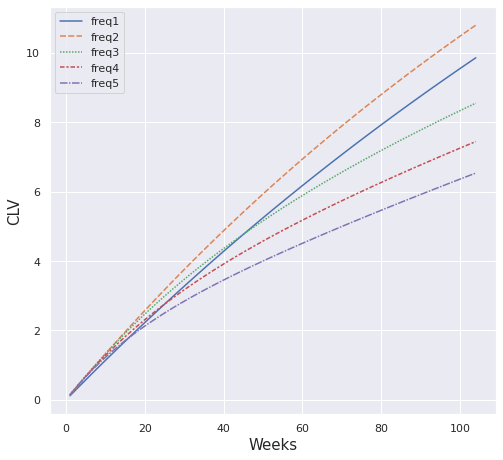

In [37]:
CLV104 = CLV104.set_index('weeks')
sns.set(rc = {'figure.figsize':(8,7.5)})
fig = sns.lineplot(data = CLV104)
fig.set_xlabel("Weeks", fontsize = 15)
fig.set_ylabel("CLV", fontsize = 15)

### Question 7 (2 points)

Are your results consistent with your answer to question 3? Why (or why not)? 

No, because the data used for question 3 comes from real life but the data used for this question is a 'idealized' data, that is, revenue and churn rate are the same across all weeks. Thus, the assumption for question 7 is more stronger than question 3, leading to different result.

### Question 8 (5 points)

Discuss at least two limitations of the experiment. How would you address these limitations?

1. The experiment did not consider customers who has unsubscribed before but choose to subscribe again. If that is possible, I will calculate a resubscribe rate and incorporate this information in the model.
2. Although all customers are randomly assigned in each group, not all customers are the most profitable customers. I will do another experiment that only randomly assign the most profitable customers and calculate CLV under different email frequency again to determine what frequency is the best choice.